# Uber NYC data analysis 

### Importing necessary libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# For generating map
import folium

#K-Means Clustering
from sklearn.cluster import KMeans

import matplotlib # For plotting functions 
import matplotlib.pyplot as plt
import seaborn as sns # for data visualizations
%matplotlib inline
from pylab import rcParams
matplotlib.style.use('ggplot')
rcParams['figure.figsize'] = 15,10  # plot width and height
rcParams['font.size'] = 15  # font size in the plot
rcParams['axes.facecolor'] = 'white' # background color in the plot.
import matplotlib as mpl
mpl.rc('lines', linewidth=3, color='r')

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading the csv file
df = pd.read_csv("uber-raw-data-aug14.csv")
df.shape


(829275, 4)

In [4]:
df.head()

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512


#### The dataset has 829,275 observations and four columns. It has four attributes,

###### Date/Time:  The date and time of the Uber pickup.
    
###### Lat(Latitude):   The latitude of the Uber pickup
    
###### Lon(Longitude): The longitude of the Uber pickup.
    
###### Base:  the TLC base company code affiliated with the Uber pickup.

## Selecting features
##### Here, selecting Latitude and Longitude in a separate dataframe called ‘clus’.

In [10]:
clus=df[['Lat','Lon']]
clus.dtypes

Lat    float64
Lon    float64
dtype: object

## We are applying a K-Means clustering.
The first step is to find the optimal value for K. This can be found out through Elbow plot as shown below.

In [13]:
# Performing K-Means Clustering
n_clusters = 15
K=range(1,15)
Sum_of_squared_distances = []
for i in range (1, n_clusters):
    kmean = KMeans(i)
    kmean.fit(clus)
    Sum_of_squared_distances.append(kmean.inertia_)

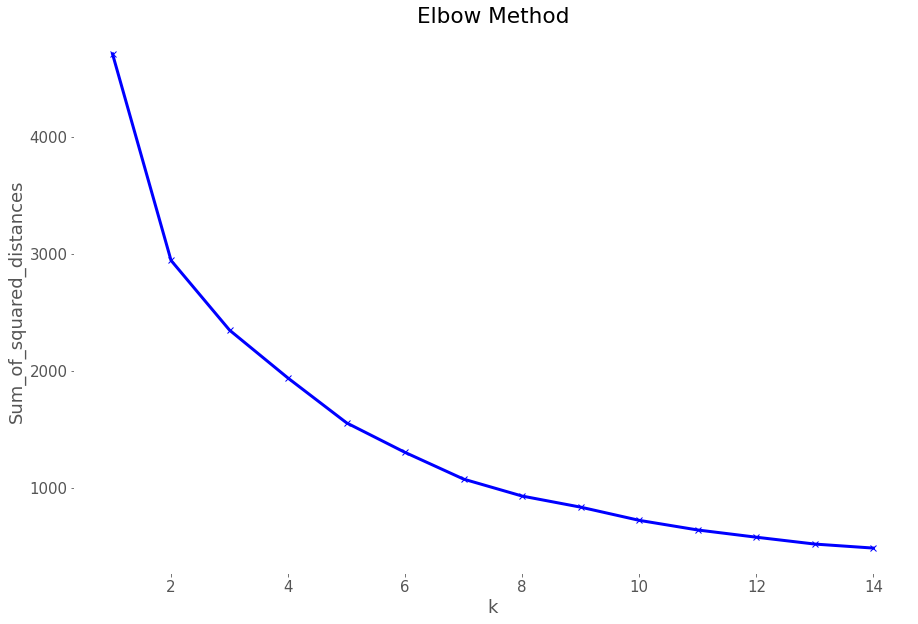

In [14]:
# Creating Elbow graph for finding optimal K 
plt.plot(K, Sum_of_squared_distances,'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method')
plt.show()

#### From the above Elbow plot, we can see that the sum of the squared distance of the observations from their closest cluster centroid keeps decreasing with an increase in the number of clusters. We can see that post K=6 there is a significant reduction. We can choose either 6 or 7 clusters. Selected 6 for this dataset.

### Performing k-Means Clustering
###### Assigning a number of cluster in K-Means algorithm


In [15]:
## Running K-Means Clustering ##
kmeans=KMeans(n_clusters=6, max_iter = 300, random_state = 12345)
kmeans.fit(clus)

KMeans(n_clusters=6, random_state=12345)

### Storing the Cluster Centroids
##### Storing cluster centroids in a different object called centroids.

In [16]:
## Storing Cluster Centroids 
centroids = kmeans.cluster_centers_
centroids

array([[ 40.76716604, -73.97150997],
       [ 40.66806839, -73.75644121],
       [ 40.68637486, -73.96276621],
       [ 40.69995129, -74.20072696],
       [ 40.7309685 , -73.99778807],
       [ 40.79689153, -73.87433905]])

##### We can see six centroids from the above output. For example, 40.68, -73.96 is the centroid for cluster 1 that is latitude and longitude value for centroid 1. Similarly, we have centroids for other clusters.

In [17]:
## Storing the latitudes & longitudes of the cluster centroids in separate variables and converted into dataframe
Lat = centroids[:,0]
Lat = pd.DataFrame(Lat)
Lat = Lat.rename(columns={0:'Latitude'})

Lon = centroids[:,1]
Lon = pd.DataFrame(Lon)
Lon = Lon.rename(columns={0:'Longitude'})

In [18]:
# Merging the Latitude and Longitude into single dataframe called clocation
clocation = pd.merge(Lat, Lon, how='inner',left_index = True, right_index = True)
clocation

,Latitude,Longitude
0,40.767166,-73.971510
1,40.668068,-73.756441
2,40.686375,-73.962766
3,40.699951,-74.200727
4,40.730969,-73.997788
5,40.796892,-73.874339


##### Taking latitudes and longitudes from the centroids and converted into two separate data frame. Merged both the data frame and named it as a ‘clocation’ for easy visualization.

### Visualizing centroids

In [19]:
#Predicting on a new location
new_location = [(40.6556,-73.5631)]
kmeans.predict(new_location)

array([1])

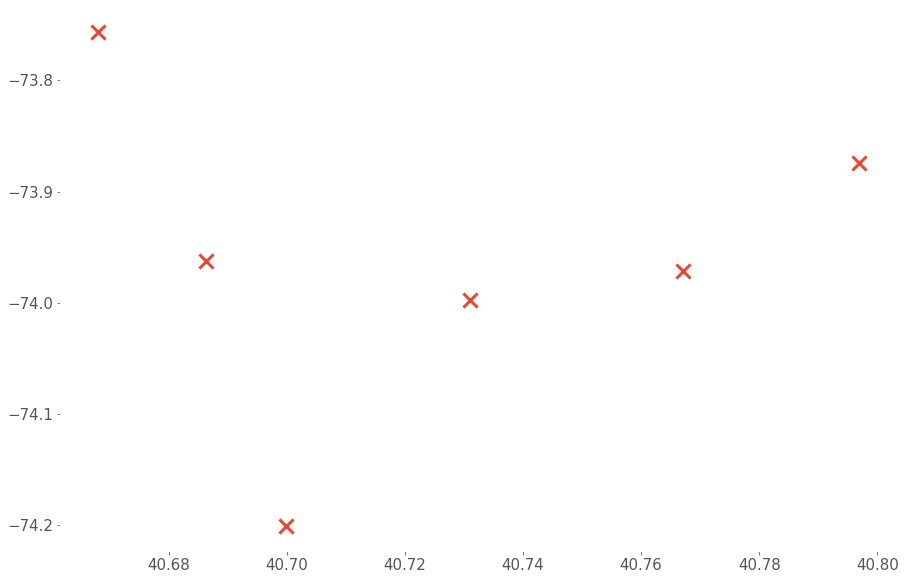

In [21]:
plt.scatter(clocation['Latitude'],clocation['Longitude'],marker="x",s=200)
plt.show()

###### We can see all the centroids pertains to each cluster in the above scatterplot. However, this doesn’t show any meaningful information. Let’s plot the same in google map (latitude & longitude) and visualize
###### Here, we used a folium library for generating the map. Passing the centroids and map the location

In [35]:
# Converting centroid into lists
centroid = clocation.values.tolist()
# Plotting the centroids on google map using Folium library.
map = folium.Map(location=[40.79658011772687, -73.87341741832425], zoom_start = 25)
for point in range(0, len(centroid)):
    folium.Marker(centroid[point], popup = centroid[point]).add_to(map)
map

#### We can see that all the six centroids have been plotted on the map

In [23]:
#prediting on a new location
new_location = [(40.6556,-73.5631)]
kmeans.predict(new_location)

array([1])

## Storing Clusters
###### Storing the clusters and merging the same into original dataset

In [26]:
# Storing the clusters in a variable
clusters = kmeans.labels_
clusters = pd.DataFrame(clusters)
clusters = clusters.rename(columns={0:'Clusters'})
# Merging cluster with main dataset and stored in df1 dataframe
df1 = pd.merge(df, clusters, how = 'inner', left_index = True, right_index = True)
df1.head()

,Date/Time,Lat,Lon,Base,Clusters
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512,4
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512,4
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512,4
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512,4
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512,4


### Checking which cluster receives maximum cab request 

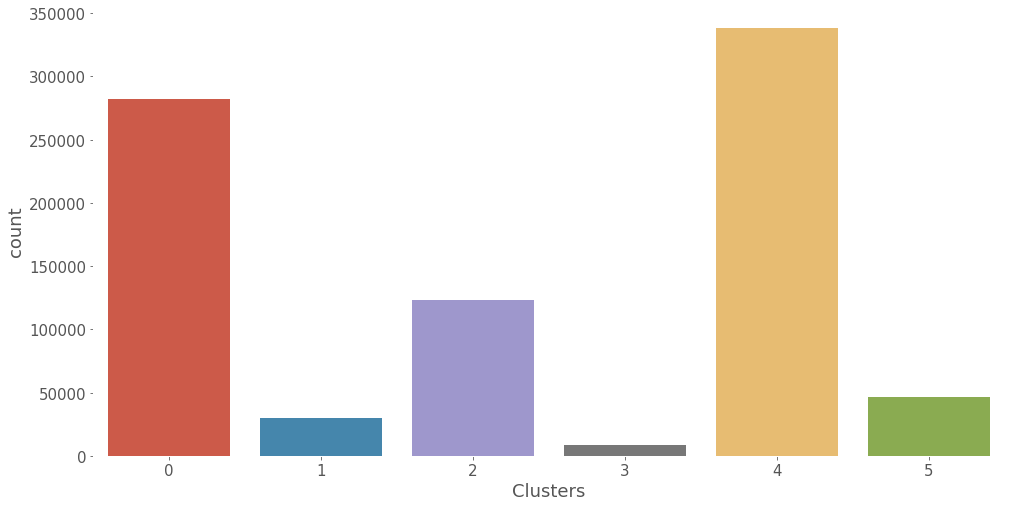

In [27]:
import seaborn as sb
sb.factorplot(data = df1, x = 'Clusters',kind = 'count', size = 7, aspect = 2)

Cluster 3 received maximum ride request followed by cluster 1.

Cluster 4 received the least request.

Uber can place more vehicles in Cluster 3 to meet higher demands.

## Checking new location

If Uber gets a new ride request (as getting their new location through longitude and latitude) then pass the latitude and longitude value, then it would predict which cluster from the vehicle should go?

In [30]:
new_location=[(44.6556,-74.5631)]
kmeans.predict(new_location)

array([5])

#### The above shows how K-Means clustering helps Uber in optimal pricing, the optimal position of cars in order to serve their customer faster and grow their business.

# THANK YOU!!!  